In [11]:
import matplotlib.pyplot as plt
import numpy as np

## This notebook

In [12]:
# values from tables.docx
phi1 = 0.2 #interaction strength for p1
phi2 = 0.1 #interaction strength for p2
mu1 = 3.0 #resource affinity parameter for p1
mu2 = 2.0 #resource affinity parameter for p2
eps1 = 0.4 #transfer efficiency for p1
eps2 = 0.3 #transfer efficiency for p2
m_p = 0.1 #producer mortality
m_c = 0.1 #consumer mortality


S_R = 0.4#resource supply

#S_R = (m_p*m_c)/(eps1*phi1)

##dR = S_R - mu1*R*P1 - mu2*R*P2 #dR/dt
##dP1 = (mu1*R*P1) - (phi1*P1*C) - (m_p*P1) #dP1/dt
##dP2 = (mu2*R*P2) - (phi2*P2*C) - (m_p*P2) #dP2/dt
##dC = (eps1*phi1*P1*C)+(eps2*phi2*P2*C) - (m_c*C) #dC/dt

In [13]:
#steady-state solutions #1 (R*,P1*,0,0)
R_star1 = (m_p/mu1)
P1_star1 = S_R/m_p
P2_star1 = 0
C_star1 = 0
print('('+ str(R_star1) + ',' + str(P1_star1) + ',' + str(P2_star1) + ','+ str(C_star1) + ')')

(0.03333333333333333,4.0,0,0)


In [14]:
#steady-state solutions #2 (R*,P1*,0,C*)
R_star2 = (S_R*eps1*phi1)/(mu1*m_c)
P1_star2 = m_c/(eps1*phi1)
P2_star2 = 0
C_star2 =((S_R*eps1)/m_c)-(m_p/phi1)
print('('+ str(R_star2) + ',' + str(P1_star2) + ',' + str(P2_star2) + ','+ str(C_star2) + ')')

(0.10666666666666667,1.2499999999999998,0,1.1000000000000003)


In [15]:
#steady-state solutions #3 (R*,0,P2*,C*)
R_star3 = (S_R*eps2*phi2)/(mu2*m_c)
P1_star3 = 0
P2_star3 = m_c/(eps2*phi2)
C_star3 =((S_R*eps2)/m_c)-(m_p/phi2)
print('('+ str(R_star3) + ',' + str(P1_star3) + ',' + str(P2_star3) + ','+ str(C_star3) + ')')

(0.06,0,3.3333333333333335,0.19999999999999996)


In [16]:
#steady-state solutions #4 (R*,0,P2*,0)
R_star4 = (m_p/mu2)
P1_star4 = 0
P2_star4 = S_R/m_p
C_star4 =0
print('('+ str(R_star4) + ',' + str(P1_star4) + ',' + str(P2_star4) + ','+ str(C_star4) + ')')

(0.05,0,4.0,0)


In [17]:
#steady-state solutions #5 (R*,P1*,P2*,C*)
R_star5 = (m_p*(phi1-phi2)/(mu2*phi1-mu1*phi2))
P1_star5 = (m_c*m_p*mu2*(phi1-phi2)+S_R*eps2*phi2*(-mu2*phi1+mu1*phi2))/(m_p*(phi1-phi2)*(eps1*mu2*phi1-eps2*mu1*phi2))
P2_star5 = (m_c*m_p*mu1*(phi2-phi1)+S_R*eps1*phi1*(mu2*phi1-mu1*phi2))/(m_p*(phi1-phi2)*(eps1*mu2*phi1-eps2*mu1*phi2))
C_star5 = (m_p*(mu2-mu1)/((mu1*phi2)-(mu2*phi1)))
print('('+ str(R_star5) + ',' + str(P1_star5) + ',' + str(P2_star5) + ','+ str(C_star5) + ')')

(0.10000000000000005,1.1428571428571432,0.2857142857142844,1.0000000000000002)


In [18]:
# differential  equation

##dR = S_R - mu1*R*P1 - mu2*R*P2 #dR/dt
def g(R):
    return S_R - (mu1*R*P1[i-1]) - (mu2*R*P2[i-1])

##dP1 = (mu1*R*P1) - (phi1*P1*C) - (m_p*P1) #dP1/dt
def f(P1):
    return  (mu1*R[i-1]*P1) - (phi1*P1*C[i-1]) - (m_p*P1)



##dP2 = (mu2*R*P2) - (phi2*P2*C) - (m_p*P2) #dP2/dt
def j(P2):
    return  (mu2*R[i-1]*P2) - (phi2*P2*C[i-1]) - (m_p*P2)


##dC = (eps1*phi1*P1*C)+(eps2*phi2*P2*C) - (m_c*C) #dC/dt
def h(C):
    return (eps1*phi1*P1[i-1]*C) + (eps2*phi2*P2[i-1]*C) - (m_c*C)


# define  initial  condition
P1_0 = 0.5
P2_0 = 0.5
R0 = 0.5
C0 = 0.5
# time  step
dt = 0.04
# time change (discrete time)
T = 350
t = np.linspace(0, 150, int(T/dt))
# array  to store  the  solution
P1 = np.zeros(len(t))
P2 = np.zeros(len(t))
R = np.zeros(len(t))
C = np.zeros(len(t))
# Euler’s method
P1[0] = P1_0
P2[0] = P2_0
R[0] = R0
C[0] = C0
for i in  range(1, len(t)):
    P1[i] = P1[i-1] + f(P1[i -1])* dt
    P2[i] = P2[i-1] + j(P2[i -1])* dt
    R[i] = R[i-1] + g(R[i -1])* dt
    C[i] = C[i-1] + h(C[i -1])* dt

In [19]:
S_R1 = 0.7#resource supply

# differential  equation

##dR = S_R - mu1*R*P1 - mu2*R*P2 #dR/dt
def g(R_1):
    return S_R1 - (mu1*R_1*P1_1[i-1]) - (mu2*R_1*P2_1[i-1])

##dP1 = (mu1*R*P1) - (phi1*P1*C) - (m_p*P1) #dP1/dt
def f(P1_1):
    return  (mu1*R_1[i-1]*P1_1) - (phi1*P1_1*C_1[i-1]) - (m_p*P1_1)



##dP2 = (mu2*R*P2) - (phi2*P2*C) - (m_p*P2) #dP2/dt
def j(P2_1):
    return  (mu2*R_1[i-1]*P2_1) - (phi2*P2_1*C_1[i-1]) - (m_p*P2_1)


##dC = (eps1*phi1*P1*C)+(eps2*phi2*P2*C) - (m_c*C) #dC/dt
def h(C_1):
    return (eps1*phi1*P1_1[i-1]*C_1) + (eps2*phi2*P2_1[i-1]*C_1) - (m_c*C_1)


# time  step
dt = 0.04
# time change (discrete time)
T = 350
t1 = np.linspace(150, T, int(T/dt))

P1_1 = np.zeros(len(t))
P2_1 = np.zeros(len(t))
R_1 = np.zeros(len(t))
C_1 = np.zeros(len(t))
# Euler’s method
P1_1[0] = P1[-1]
P2_1[0] = P2[-1]
R_1[0] = R[-1]
C_1[0] = C[-1]
for i in  range(1, len(t1)):
    P1_1[i] = P1_1[i-1] + f(P1_1[i -1])* dt
    P2_1[i] = P2_1[i-1] + j(P2_1[i -1])* dt
    R_1[i] = R_1[i-1] + g(R_1[i -1])* dt
    C_1[i] = C_1[i-1] + h(C_1[i -1])* dt

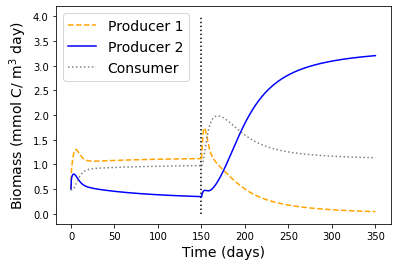

In [24]:
plt.figure()
plt.plot(t,P1, '--', color = 'orange')
plt.plot(t,P2, 'blue')
plt.plot(t, C, color = 'grey', linestyle = 'dotted')

plt.plot(t1,P1_1, '--', color = 'orange')
plt.plot(t1,P2_1, 'blue')

plt.plot(t1, C_1, color = 'grey', linestyle = 'dotted')
#plt.axhline(P1_star3,0,350, color = 'black',linestyle = 'dotted')
#plt.axhline(P2_star3,0,350, color = 'black',linestyle = 'dotted')
#plt.plot(t,R,'b')
#plt.plot(t,C, 'g')
plt.vlines(150,0,4, color = 'black',linestyle = 'dotted')

plt.xlabel('Time (days)', color = 'k')
plt.ylabel('Biomass (mmol C/ m$^{3}$ day)', color = 'k')

plt.legend(['Producer 1','Producer 2', 'Consumer'], loc ='upper left')



plt.savefig("coexist", bbox_inches='tight', dpi=300)

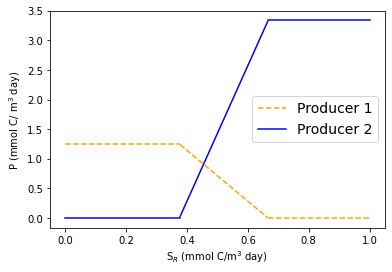

In [21]:
plt.rc_context({'axes.edgecolor':'black'})

P1_star_seg1 = []
P2_star_seg1 = []
S_R = []
for r in [0,0.3775]:
    S_R.append(r)
    P1_star_seg1.append(P1_star2)
    P2_star_seg1.append(P2_star2)
plt.plot(S_R,P1_star_seg1,'--', color='orange')
plt.plot(S_R,P2_star_seg1, color = 'blue')


P1_star_seg3 = []
P2_star_seg3 = []
S_R = []
for r in [0.6665,1]:
    S_R.append(r)
    P1_star_seg3.append(P1_star3)
    P2_star_seg3.append(P2_star3)
plt.plot(S_R,P1_star_seg3, '--', color = 'orange')
plt.plot(S_R,P2_star_seg3, color = 'blue')

P1_star_seg2 = []
P2_star_seg2 = []
for S_R in [0.3775,0.5,0.665]:
    P1_star5 = (m_c*m_p*mu2*(phi1-phi2)+S_R*eps2*phi2*(-mu2*phi1+mu1*phi2))/(m_p*(phi1-phi2)*(eps1*mu2*phi1-eps2*mu1*phi2))
    P2_star5 = (m_c*m_p*mu1*(phi2-phi1)+S_R*eps1*phi1*(mu2*phi1-mu1*phi2))/(m_p*(phi1-phi2)*(eps1*mu2*phi1-eps2*mu1*phi2))
    P1_star_seg2.append(P1_star5)
    P2_star_seg2.append(P2_star5)

S_R = []
for r in [0.3775,0.5,0.665]:
    S_R.append(r)
plt.plot(S_R,P1_star_seg2,'--', color = 'orange')
plt.plot(S_R,P2_star_seg2, color = 'blue')


plt.xlabel('S$_{R}$ (mmol C/m$^{3}$ day)', color = 'k')
plt.ylabel('P (mmol C/ m$^{3}$ day)', color = 'k')
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels

plt.legend(['Producer 1','Producer 2'], loc ='center right')

plt.savefig('pstars.png')

In [12]:
#coexistence during resource levels of 0.3775 to 0.665

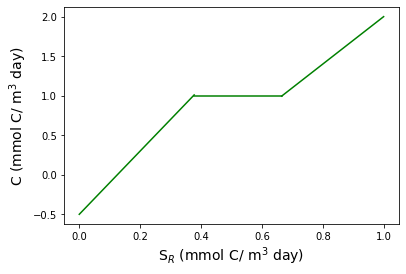

In [13]:
C_star_seg1 = []
S_R = []
for r in [0,0.3775]:
    S_R.append(r)
    C_star2 =((r*eps1)/m_c)-(m_p/phi1)
    C_star_seg1.append(C_star2)
plt.plot(S_R,C_star_seg1, color='green')


C_star_seg2 = []
S_R = []
for r in [0.3775,0.5,0.665]:
    S_R.append(r)
    C_star_seg2.append(C_star5)
plt.plot(S_R,C_star_seg2, color='green')

C_star_seg3 = []
S_R = []
for r in [0.665,1]:
    S_R.append(r)
    C_star3 =((r*eps2)/m_c)-(m_p/phi2)
    C_star_seg3.append(C_star3)
plt.plot(S_R,C_star_seg3, color='green')


plt.xlabel('S$_{R}$ (mmol C/ m$^{3}$ day)')
plt.ylabel('C (mmol C/ m$^{3}$ day)', color = 'k')

plt.savefig('consumer.png')

Text(0, 0.5, 'C')

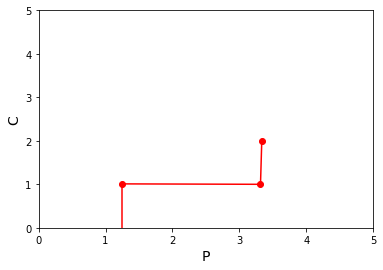

In [14]:
plt.ylim(0,5)
plt.xlim(0,5)

plt.plot(P1_star2,C_star2,'or')
plt.plot(P2_star5,C_star5,'or')
plt.plot(P2_star3,C_star3,'or')

#print(C_star2, P1_star2, C_star5, P2_star5, C_star3, P2_star3)

plt.plot([P1_star2,P1_star2],[C_star2,0],'r')
plt.plot([P1_star2,P2_star5],[C_star2,C_star5],'r')
plt.plot([P2_star5,P2_star3],[C_star5,C_star3],'r')

plt.xlabel('P')
plt.ylabel('C')